In [28]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [30]:
data=pd.read_csv('/content/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


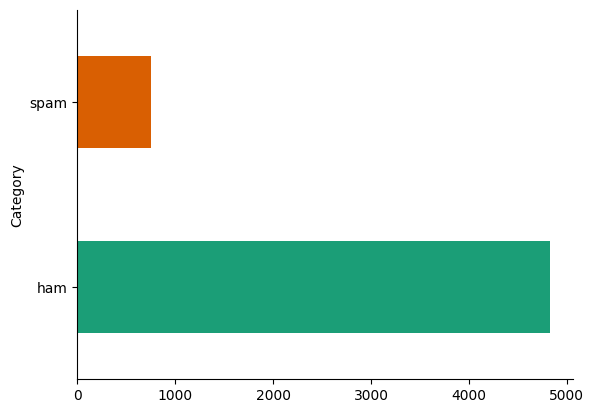

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])

    return text

# Apply the preprocessing function to the Message column
data['cleaned_message'] = data['Message'].apply(preprocess_text)

# Display the first few rows of the dataframe
print(data.head())

  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # You can adjust max_features based on your dataset

# Fit and transform the cleaned messages
X = tfidf_vectorizer.fit_transform(data['cleaned_message'])

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())


   aah  aathilove  aathiwhere  abi  abiola  able  abt  abta   ac  acc  ...  \
0  0.0        0.0         0.0  0.0     0.0   0.0  0.0   0.0  0.0  0.0  ...   
1  0.0        0.0         0.0  0.0     0.0   0.0  0.0   0.0  0.0  0.0  ...   
2  0.0        0.0         0.0  0.0     0.0   0.0  0.0   0.0  0.0  0.0  ...   
3  0.0        0.0         0.0  0.0     0.0   0.0  0.0   0.0  0.0  0.0  ...   
4  0.0        0.0         0.0  0.0     0.0   0.0  0.0   0.0  0.0  0.0  ...   

   youre  youve   yr  yrs  yummy  yun  yuo  yup  zed  üll  
0    0.0    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 3000 columns]


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the Category column
data['label'] = label_encoder.fit_transform(data['Category'])

# Display the first few rows with labels
print(data.head())



  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  label  
0  go jurong point crazy available bugis n great ...      0  
1                            ok lar joking wif u oni      0  
2  free entry wkly comp win fa cup final tkts st ...      1  
3                u dun say early hor u c already say      0  
4        nah dont think goes usf lives around though      0  


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (4457, 3000)
Test data shape: (1115, 3000)


In [23]:
from imblearn.over_sampling import SMOTE
# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd


In [24]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1


In [25]:
# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy  Precision    Recall  F1 Score
Naive Bayes             0.977578   1.000000  0.832215  0.908425
Logistic Regression     0.963229   0.990909  0.731544  0.841699
Support Vector Machine  0.981166   1.000000  0.859060  0.924188
Random Forest           0.981166   1.000000  0.859060  0.924188


In [26]:
# Choose the best model based on F1 Score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]

print(f"The best model is {best_model_name} with an F1 Score of {results_df.loc[best_model_name, 'F1 Score']:.4f}")


The best model is Support Vector Machine with an F1 Score of 0.9242


In [27]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Model: {best_model}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Model: LogisticRegression(C=100, solver='liblinear')
Accuracy: 0.9839
Precision: 0.9781
Recall: 0.8993
F1 Score: 0.9371


In [29]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Save the best model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Load the model from a file
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
tfidf_vectorizer.fit(data['cleaned_message'])

@app.route('/predict', methods=['POST'])
def predict():
    message = request.json['message']
    cleaned_message = preprocess_text(message)
    vectorized_message = tfidf_vectorizer.transform([cleaned_message])
    prediction = model.predict(vectorized_message)
    label = label_encoder.inverse_transform(prediction)[0]
    return jsonify({'prediction': label})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
